In [12]:
import matplotlib.pyplot as plt
import numpy as np


def CreateSeries(File,FreqRef):

    with open(File) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    V = [x.strip().split("\t")[1] for x in content] 
    V = np.array(V).astype(np.float32)
    t = [x.strip().split("\t")[0] for x in content]
    t = np.array(t).astype(np.float)
    MaxT = t[-1]

    return t,V,MaxT



In [22]:
dataset = "rawdata/TwoADC.data"
t,V,MaxT = CreateSeries(dataset,10000000)
print MaxT
print len(t)

print np.log2(2290038294)

65528.4
10000
31.0927245772


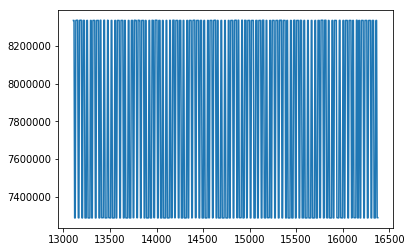

In [23]:
plt.plot(t[2000:2500], V[2000:2500])
plt.show() 

In [24]:
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]

ADC2_pins = [38,37,36,35,33,32,26,24,23]
ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC1len = len(ADC2_GPIO)


def GetV1(Volts):
    
    Map = np.zeros((len(V),34), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        for k in range(34):
            Map[i][k] = (val & 2**k)/2**k

    return Map



In [25]:
Map = np.asarray(GetV1(V))
Map


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

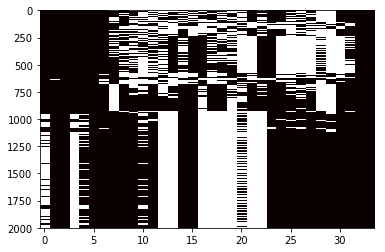

In [26]:
im = plt.imshow(Map[0:2000], cmap='hot', aspect="auto")
#plt.colorbar(im, orientation='horizontal')
plt.show()

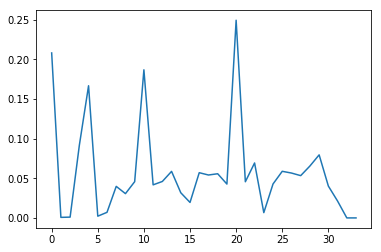

In [27]:
plt.plot(np.var(Map,0))
plt.show() 

In [28]:

#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

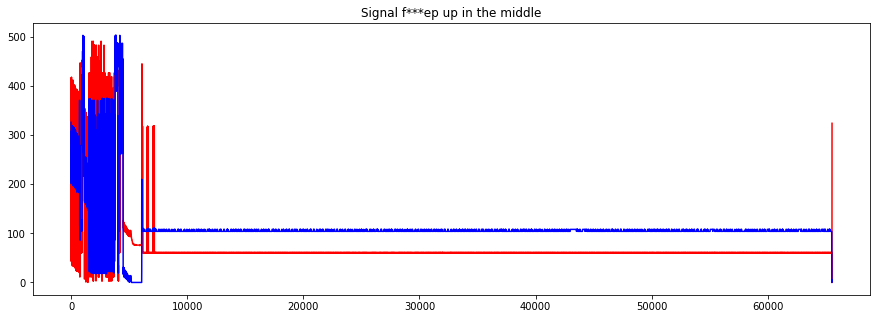

In [29]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
plt.figure(figsize=(15,5))
plt.plot(t,M,"r")
plt.plot(t,M2,"b")
plt.title("Signal f***ep up in the middle")
plt.savefig('issue'+dataset.split("/")[-1]+'.png', bbox_inches='tight')
plt.show()

In [30]:
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

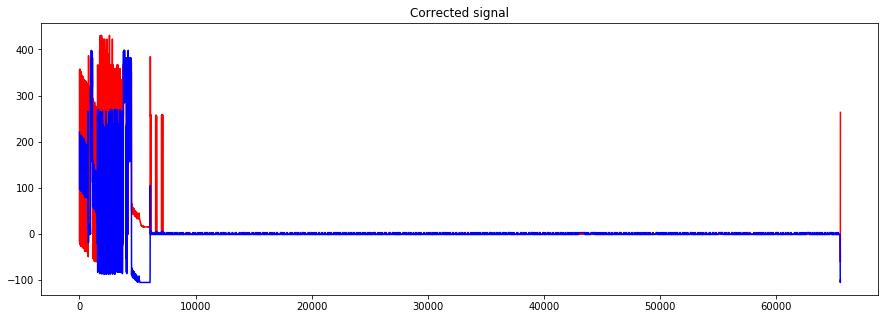

In [31]:
plt.figure(figsize=(15,5))
plt.plot(t,Ma,"r")
plt.plot(t,Mb,"b")
plt.title("Corrected signal")
plt.savefig('twoADCs.png', bbox_inches='tight')
plt.show()